
<H1>PROJET DATA EXPLORATION </h1>
<h3>Youssef Saidi et Lucas Terra</h3>
Dans ce rapport on a détaillé tout ce qu'on a pu trouver et decouvrir sur un jeux de donnée qui regroupe des informations sur des voitures en effectuant toutes les etudes vue precedament en classe.


<h2>Préparation des données</h2>

In [46]:
%matplotlib widget
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr
from sklearn.decomposition import PCA   
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv(
    filepath_or_buffer="Jeux/Cars.csv",
    decimal=".", 
    sep=";"
)

In [47]:
print("Sur ce projet on a", dataset.shape[0], "voiture à vendre et accompagné", dataset.shape[1], "caractéristique(variables).")


Sur ce projet on a 193 voiture à vendre et accompagné 25 caractéristique(variables).


In [3]:
dataset.head()

,continent,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,...,peak-rpm,city-mpg,highway-mpg,price,wheel-base,length,width,height,curb-weight,engine-size
0,europe,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,...,5000,21,27,13495,88.6,168.8,64.1,48.8,2548,130
1,europe,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,...,5000,21,27,16500,88.6,168.8,64.1,48.8,2548,130
2,europe,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,...,5000,19,26,16500,94.5,171.2,65.5,52.4,2823,152
3,europe,audi,gas,std,four,sedan,fwd,front,ohc,four,...,5500,24,30,13950,99.8,176.6,66.2,54.3,2337,109
4,europe,audi,gas,std,four,sedan,4wd,front,ohc,five,...,5500,18,22,17450,99.4,176.6,66.4,54.3,2824,136


In [4]:
for v in dataset.columns:
    print((pd.DataFrame(dataset[v].describe()).T))
    print("____________________________________________________________________________")


          count unique   top freq
continent   193      3  asie  102
____________________________________________________________________________
     count unique     top freq
make   193     20  toyota   32
____________________________________________________________________________
          count unique  top freq
fuel-type   193      2  gas  174
____________________________________________________________________________
           count unique  top freq
aspiration   193      2  std  158
____________________________________________________________________________
             count unique   top freq
num-of-doors   193      2  four  112
____________________________________________________________________________
           count unique    top freq
body-style   193      5  sedan   92
____________________________________________________________________________
             count unique  top freq
drive-wheels   193      3  fwd  114
________________________________________________________

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   continent          193 non-null    object 
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   engine-type        193 non-null    object 
 9   num-of-cylinders   193 non-null    object 
 10  fuel-system        193 non-null    object 
 11  bore               193 non-null    float64
 12  stroke             193 non-null    float64
 13  compression-ratio  193 non-null    float64
 14  horsepower         193 non-null    int64  
 15  peak-rpm           193 non-null    int64  
 16  city-mpg           193 non

In [41]:
array = dataset.values[:,11:24]
cor = dataset.corr(numeric_only=True)

cor.style.background_gradient(cmap='coolwarm')

,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,wheel-base,length,width,height,curb-weight,engine-size
bore,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804,0.546295,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854
stroke,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274,0.096007,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518
compression-ratio,-0.004172,0.199600,1.000000,-0.203818,-0.439741,0.314648,0.249669,0.074483,0.252234,0.156061,0.188631,0.253934,0.161030,0.025257
horsepower,0.572972,0.102913,-0.203818,1.000000,0.101383,-0.833615,-0.812078,0.812453,0.377040,0.589650,0.621532,-0.081730,0.762154,0.845325
peak-rpm,-0.273766,-0.068420,-0.439741,0.101383,1.000000,-0.061032,-0.008412,-0.103835,-0.350823,-0.276144,-0.247612,-0.257334,-0.278528,-0.217769
city-mpg,-0.601369,-0.031248,0.314648,-0.833615,-0.061032,1.000000,0.971975,-0.706618,-0.504499,-0.702143,-0.657153,-0.111166,-0.777763,-0.716378
highway-mpg,-0.608804,-0.040274,0.249669,-0.812078,-0.008412,0.971975,1.000000,-0.719178,-0.571771,-0.731264,-0.702009,-0.159850,-0.818104,-0.737531
price,0.546295,0.096007,0.074483,0.812453,-0.103835,-0.706618,-0.719178,1.000000,0.584951,0.695928,0.754649,0.136234,0.835368,0.888778
wheel-base,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375
length,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998


In [45]:
dataset2 = dataset.drop(columns=["stroke","compression-ratio","peak-rpm"])
cor2 = dataset2.corr(numeric_only=True)

cor2.style.background_gradient(cmap='coolwarm')

,bore,horsepower,city-mpg,highway-mpg,price,wheel-base,length,width,height,curb-weight,engine-size
bore,1.000000,0.572972,-0.601369,-0.608804,0.546295,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854
horsepower,0.572972,1.000000,-0.833615,-0.812078,0.812453,0.377040,0.589650,0.621532,-0.081730,0.762154,0.845325
city-mpg,-0.601369,-0.833615,1.000000,0.971975,-0.706618,-0.504499,-0.702143,-0.657153,-0.111166,-0.777763,-0.716378
highway-mpg,-0.608804,-0.812078,0.971975,1.000000,-0.719178,-0.571771,-0.731264,-0.702009,-0.159850,-0.818104,-0.737531
price,0.546295,0.812453,-0.706618,-0.719178,1.000000,0.584951,0.695928,0.754649,0.136234,0.835368,0.888778
wheel-base,0.495957,0.377040,-0.504499,-0.571771,0.584951,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375
length,0.606373,0.589650,-0.702143,-0.731264,0.695928,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998
width,0.541633,0.621532,-0.657153,-0.702009,0.754649,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903
height,0.182445,-0.081730,-0.111166,-0.159850,0.136234,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906
curb-weight,0.645070,0.762154,-0.777763,-0.818104,0.835368,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188


In [6]:
# on standardise nos données :



values = StandardScaler().fit_transform(array)
values

array([[ 0.51302731, -1.80818563, -0.28827253, ..., -0.84126272,
        -2.12259761, -0.02571274],
       [ 0.51302731, -1.80818563, -0.28827253, ..., -0.84126272,
        -2.12259761, -0.02571274],
       [-2.39482676,  0.70291796, -0.28827253, ..., -0.18467928,
        -0.61541231,  0.497764  ],
       ...,
       [ 0.91791839, -1.20424932, -0.33868626, ...,  1.4098805 ,
         0.6824417 ,  0.85753529],
       [-1.18015354,  0.48041511,  3.24068891, ...,  1.4098805 ,
         0.6824417 ,  1.24776341],
       [ 1.65408397, -0.31423793, -0.16223819, ...,  1.4098805 ,
         0.6824417 ,  0.95271288]])

In [7]:
print(pearsonr(values[:,1], values[:,4]))

PearsonRResult(statistic=-0.06841959580719013, pvalue=0.344429572173001)


In [8]:
model_acp=PCA(0.8)

acp = model_acp.fit_transform(values)
acp.shape

(193, 4)

In [9]:
model_acp.explained_variance_ratio_.sum()


0.8504294515494942

In [10]:
comp1 = acp[:,0]
comp2 = acp[:,1]
comp3 = acp[:,2]
pearsonr(comp1, comp2)

PearsonRResult(statistic=-3.4423418976414766e-18, pvalue=1.0000000000000968)

In [11]:
model_acp.explained_variance_

array([6.83782924, 2.23794919, 1.15440509, 0.88298052])

In [12]:
model_acp.explained_variance_ratio_

array([0.52326154, 0.17125797, 0.08834029, 0.06756965])

In [13]:
model_acp.explained_variance_ratio_.cumsum()

array([0.52326154, 0.69451951, 0.7828598 , 0.85042945])

In [14]:
model_acp.n_components_

4

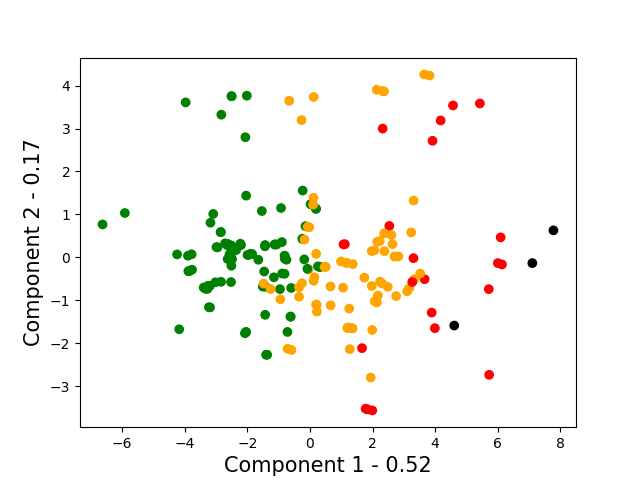

In [15]:
def mapc(p):
    mapping = [(10000, "green"), (20000, "orange"), (40000, "red"),(50000, "black")] # Add all your values and returns here
    c = []
    for i in p:
        for check, value in mapping:
            if int(i) <= check:
                c.append(value)
                break
    return c
plt.xlabel('Component 1 - '+format(model_acp.explained_variance_ratio_[0],'.2f'),fontsize=15)
plt.ylabel('Component 2 - '+format(model_acp.explained_variance_ratio_[1],'.2f'),fontsize=15)        
plt.scatter(comp1,comp2,c=mapc(dataset["price"]))
plt.show()

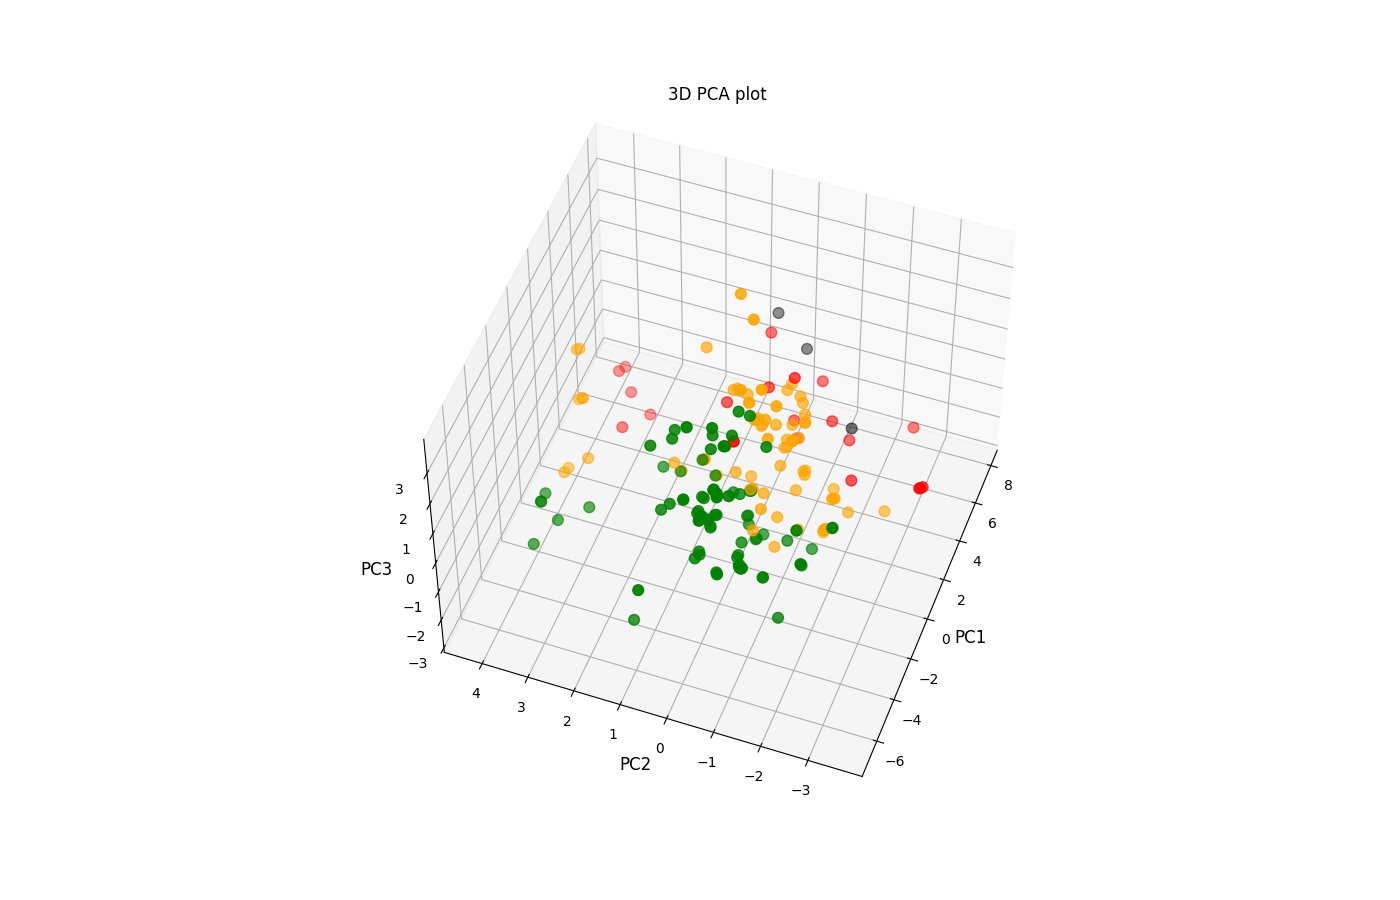

In [20]:

fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, 
                     projection='3d')
 
ax.scatter(comp1, 
            comp2, 
            comp3, 
            c=mapc(dataset["price"]),
            s=60)
 
ax.set_xlabel("PC1", 
              fontsize=12)
ax.set_ylabel("PC2", 
              fontsize=12)
ax.set_zlabel("PC3", 
              fontsize=12)
 
ax.view_init(50, 200)
plt.title("3D PCA plot")
plt.show()